# Exploratory Data Analysis 

## Index:
* [Understanding-data](#Understanding-data)
 * [neighbourhood_overview](#neighbourhood_overview)
 * [host_identity_verified](#host_identity_verified)
 * [price](#price)
 * [Neighbourhood](#neighbourhood)
    * [Limpieza de datos](#limpieza_datos)
    * [EDA con la variable neighbourhood](#eda_neighborhood)
* [Second Bullet Header](#second-bullet)

## Importing packages

In [1]:
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
#import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import *
import seaborn as sns

# Understanding / Cleaning the data <a class="anchor" id="Understanding-data"></a>

In [2]:
# download the data
Airbnb_data = pd.read_csv('LosAngeles/listings_2.csv')
#make the price column into floats instead of strings
Airbnb_data['price'] = Airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float) 

In [3]:
# veiw the data
Airbnb_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20210807024723,2021-08-07,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20210807024723,2021-08-07,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,4.97,5.00,4.84,NaN,t,2,0,2,0,0.71
2,2732,https://www.airbnb.com/rooms/2732,20210807024723,2021-08-07,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,4.70,4.90,4.40,228269,f,2,1,1,0,0.38
3,2864,https://www.airbnb.com/rooms/2864,20210807024723,2021-08-07,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,https://www.airbnb.com/users/show/3207,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4,3021,https://www.airbnb.com/rooms/3021,20210807024723,2021-08-07,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,https://a0.muscache.com/pictures/5147dcd2-efad...,3415,https://www.airbnb.com/users/show/3415,...,4.30,4.64,4.00,NaN,f,4,1,3,0,0.41


### Data information

In [4]:
### Size
Airbnb_data.shape

(32240, 74)

In [5]:
Airbnb_data.info()
# es un base de datos pesada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32240 entries, 0 to 32239
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            32240 non-null  int64  
 1   listing_url                                   32240 non-null  object 
 2   scrape_id                                     32240 non-null  int64  
 3   last_scraped                                  32240 non-null  object 
 4   name                                          32238 non-null  object 
 5   description                                   31082 non-null  object 
 6   neighborhood_overview                         19789 non-null  object 
 7   picture_url                                   32240 non-null  object 
 8   host_id                                       32240 non-null  int64  
 9   host_url                                      32240 non-null 

In [6]:
# Columnas del dataframe
Airbnb_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [7]:
# statistic description
Airbnb_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.224000e+04,3.224000e+04,3.224000e+04,32199.000000,32199.000000,32240.000000,32240.000000,32240.000000,0.0,28531.000000,...,23921.000000,23911.000000,23919.000000,23908.000000,23906.000000,32240.000000,32240.000000,32240.000000,32240.000000,24271.00000
mean,3.094821e+07,2.021081e+13,1.162544e+08,36.371626,36.371626,34.048439,-118.319611,3.601427,NaN,1.665627,...,4.695832,4.846225,4.830847,4.802772,4.678927,12.926799,10.285329,2.095596,0.491191,2.08994
std,1.579977e+07,7.968874e-01,1.201506e+08,200.998227,200.998227,0.133991,0.165689,2.539507,NaN,1.085385,...,0.506427,0.412591,0.440036,0.399118,0.494423,37.106482,35.622842,11.307134,4.438934,4.39220
min,1.090000e+02,2.021081e+13,5.210000e+02,0.000000,0.000000,33.338480,-118.934830,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.01000
25%,1.822399e+07,2.021081e+13,1.694717e+07,1.000000,1.000000,33.996918,-118.423600,2.000000,NaN,1.000000,...,4.620000,4.860000,4.850000,4.770000,4.610000,1.000000,0.000000,0.000000,0.000000,0.24000
50%,3.329885e+07,2.021081e+13,6.824693e+07,2.000000,2.000000,34.060310,-118.344650,3.000000,NaN,1.000000,...,4.860000,4.970000,4.970000,4.920000,4.810000,2.000000,1.000000,0.000000,0.000000,0.89000
75%,4.570328e+07,2.021081e+13,1.852758e+08,7.000000,7.000000,34.104090,-118.252050,4.000000,NaN,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.960000,6.000000,3.000000,1.000000,0.000000,2.54000
max,5.150898e+07,2.021081e+13,4.168894e+08,2232.000000,2232.000000,34.811130,-117.653400,16.000000,NaN,15.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,306.000000,306.000000,153.000000,75.000000,185.00000


In [8]:
Airbnb_data.describe(include=['object'])

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,32240,32240,32238,31082,19789,32240,32240,32199,32199,32126,...,32240,32240,32182,32240,32240,32240,24271,24271,8011,32240
unique,32240,2,31121,28751,16627,30798,18187,6994,3885,974,...,104,4,48,29201,2,2,2879,2049,4435,2
top,https://www.airbnb.com/rooms/109,2021-08-07,Boutique Hostel,<b>License number</b><br />Exempt - This listi...,The neighborhood of Sherman Oaks is a very aff...,https://a0.muscache.com/pictures/b8f67b03-6e16...,https://www.airbnb.com/users/show/107434423,Blueground,2016-12-16,"Los Angeles, California, United States",...,Entire rental unit,Entire home/apt,1 bath,"[""Long term stays allowed""]",t,2021-08-07,2021-05-31,2021-08-01,Exempt - This listing is a transient occupancy...,f
freq,1,32236,75,89,127,75,306,306,319,13879,...,8129,21719,14112,88,31270,32236,76,764,1173,20908


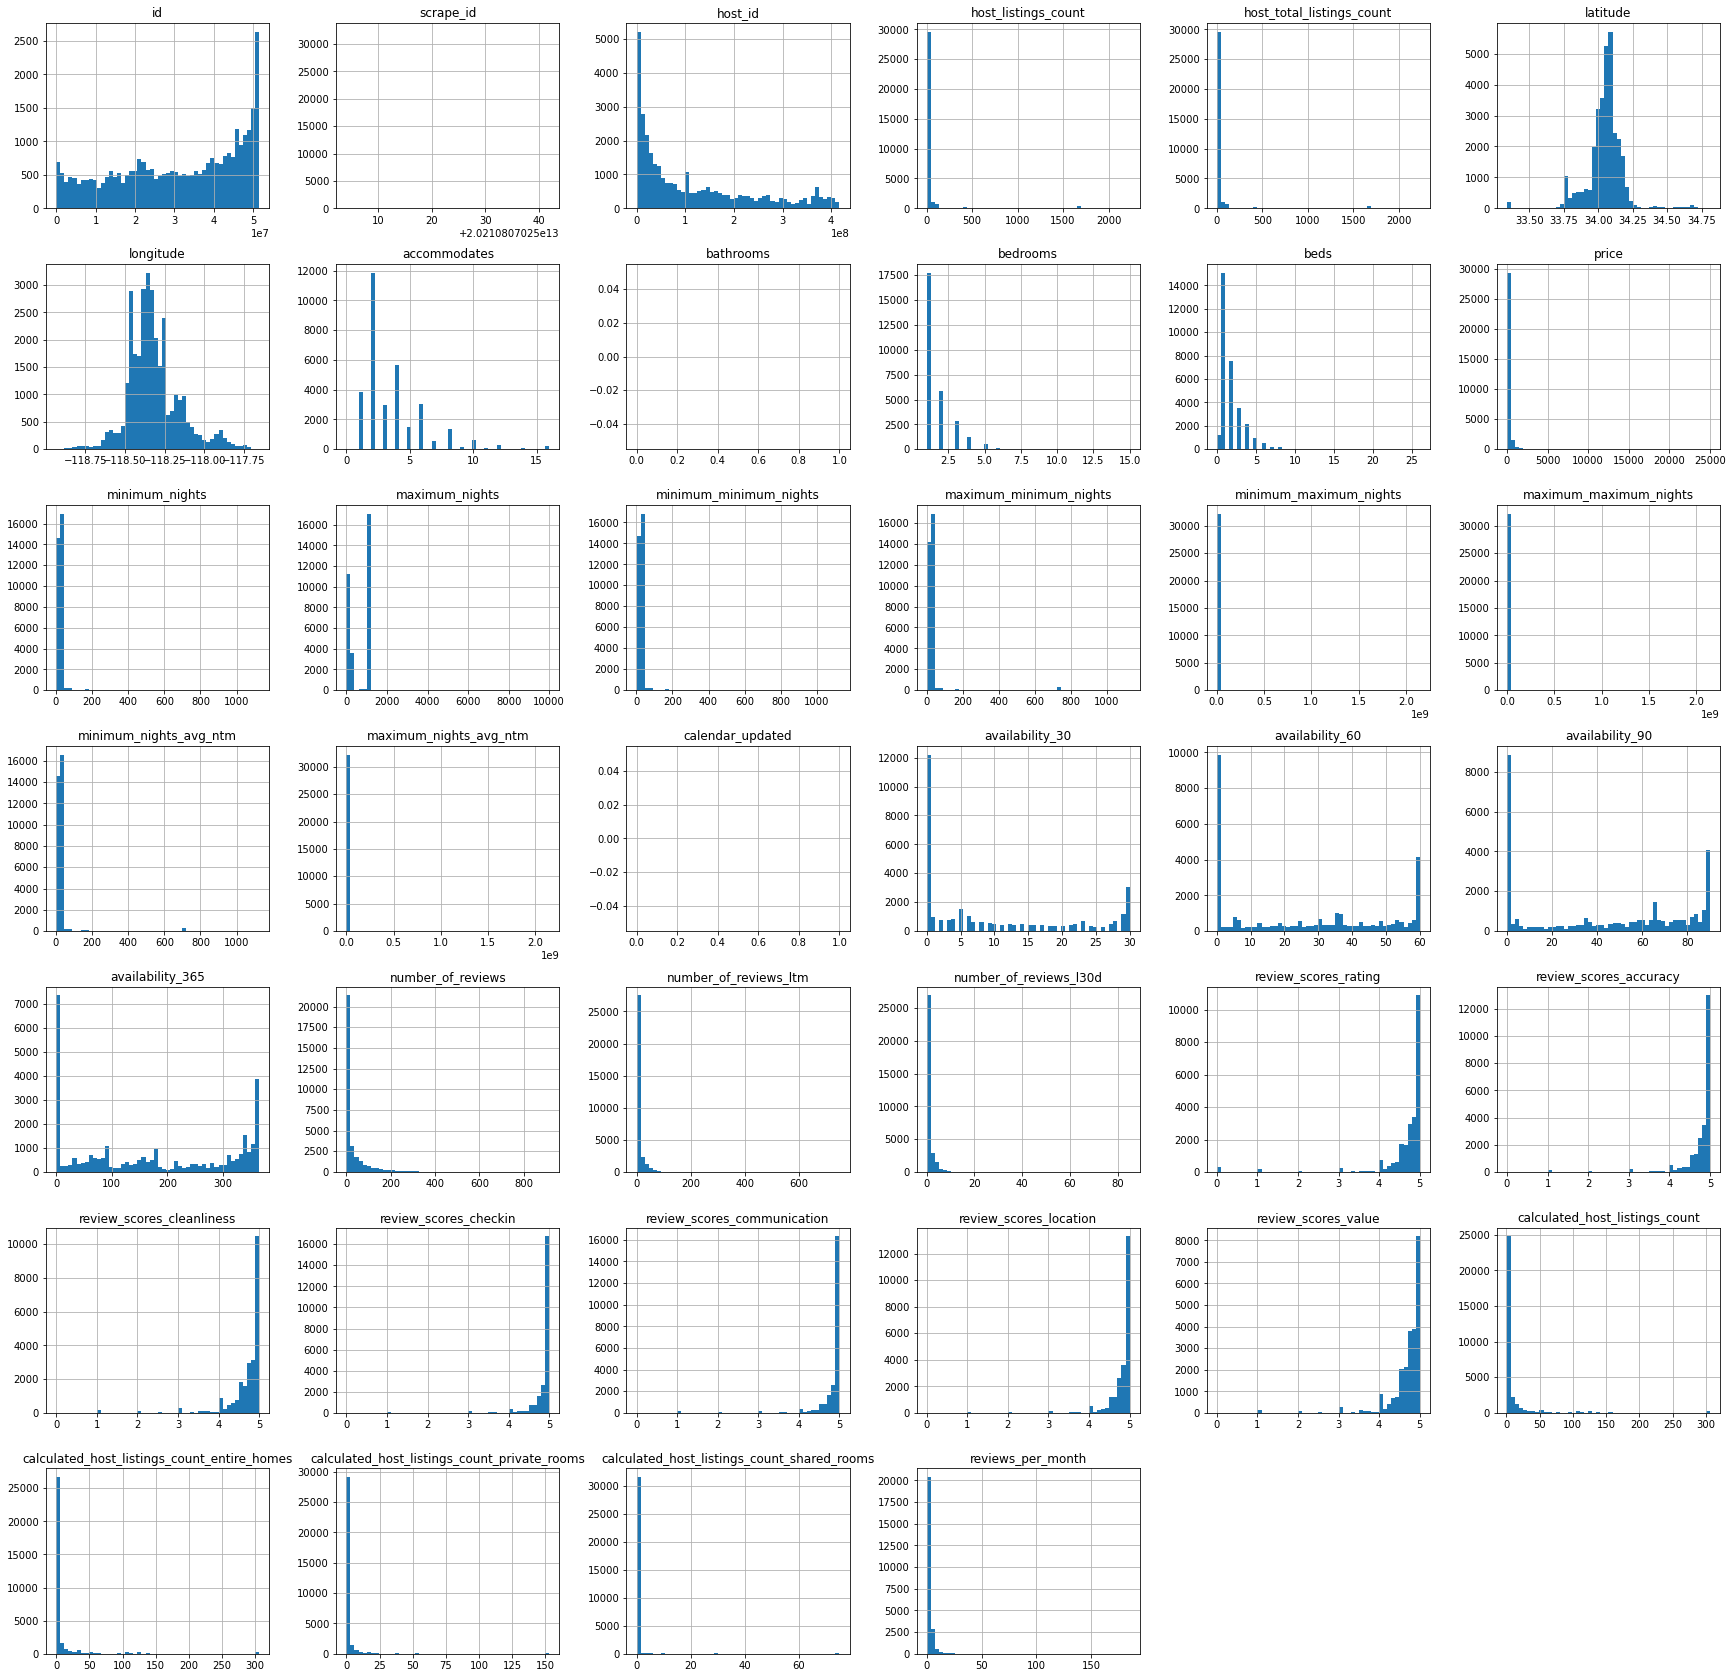

In [9]:
Airbnb_data.hist(bins=50, figsize=(30,30))
plt.show()

In [10]:
Airbnb_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

### Variables que vamos a ocupar:

In [11]:
new_Airbnb_data= Airbnb_data[['listing_url','name','description','neighborhood_overview', 
                          'picture_url','host_location', 'host_about','host_response_time', 'host_response_rate',
                          'host_acceptance_rate','host_is_superhost','host_picture_url','host_neighbourhood',
                          'host_has_profile_pic', 'host_identity_verified', 'neighbourhood','neighbourhood_cleansed','latitude',
                          'longitude', 'property_type', 'room_type', 'accommodates', 
                          'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price','minimum_nights', 
                          'maximum_nights','number_of_reviews','first_review','last_review','review_scores_rating',
                          'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                          'review_scores_communication', 'review_scores_location','review_scores_value',
                          'reviews_per_month'
                         ]]
print("Número de variables: ",len(new_Airbnb_data.columns))

Número de variables:  40


In [12]:
new_Airbnb_data.head()

,listing_url,name,description,neighborhood_overview,picture_url,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,https://www.airbnb.com/rooms/109,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,NaN,...,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,0.02
1,https://www.airbnb.com/rooms/2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,100%,...,2017-12-29,2021-06-19,4.84,4.77,4.90,5.00,4.97,5.00,4.84,0.71
2,https://www.airbnb.com/rooms/2732,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,100%,36%,...,2017-01-13,2019-12-27,4.68,4.45,4.57,4.65,4.70,4.90,4.40,0.38
3,https://www.airbnb.com/rooms/2864,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,"Bellflower, California, United States","Fair, open, honest and very informative for ne...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.airbnb.com/rooms/3021,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,https://a0.muscache.com/pictures/5147dcd2-efad...,"Los Angeles, California, United States","Music Industry, Record producer, Songwriter, C...",within a few hours,100%,25%,...,2017-01-03,2018-10-31,4.04,4.04,3.83,3.96,4.30,4.64,4.00,0.41


<AxesSubplot:>

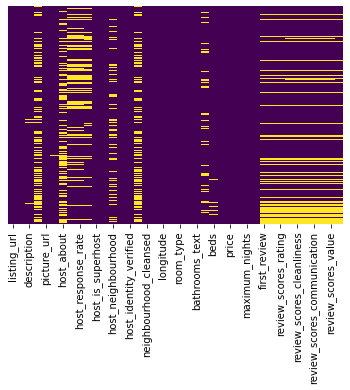

In [13]:
sns.heatmap(new_Airbnb_data.isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

In [14]:
print("total de datos", new_Airbnb_data.shape[0], "\n")
print([new_Airbnb_data.isnull().sum()])

total de datos 32240 

[listing_url                        0
name                               2
description                     1158
neighborhood_overview          12451
picture_url                        0
host_location                    114
host_about                     12873
host_response_time              8602
host_response_rate              8602
host_acceptance_rate            8401
host_is_superhost                 41
host_picture_url                  41
host_neighbourhood              6296
host_has_profile_pic              41
host_identity_verified            41
neighbourhood                  12450
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                    58
bedrooms                        3709
beds                             638
amenities                          0
price         

# neighbourhood <a class="anchor" id="neighbourhood"></a>

In [91]:
print("\ntotal de valores nulos en Neighbourhood: ",new_Airbnb_data['neighbourhood'].isnull().sum())
print("\ntotal de valores nulos en latitude: ",new_Airbnb_data['latitude'].isnull().sum())
print("\ntotal de valores nulos en longitude: ",new_Airbnb_data['longitude'].isnull().sum())


total de valores nulos en Neighbourhood:  12450

total de valores nulos en latitude:  0

total de valores nulos en longitude:  0


In [104]:
new_Airbnb_data['neighbourhood'][11:17]

11                                       NaN
12                                       NaN
13    Los Angeles, California, United States
14                                       NaN
15                                       NaN
16         Venice, California, United States
Name: neighbourhood, dtype: object

In [108]:
pd.DataFrame(new_Airbnb_data.groupby('neighbourhood').size()).index.tolist()

[' Los Angeles, California, United States',
 ' walnut, California, United States',
 'Acton, California, United States',
 'Agoura Hills, California, United States',
 'Agua Dulce, California, United States',
 'Alhambra, California, United States',
 'Altadena , California, United States',
 'Altadena, California, United States',
 'Arcadia , California, United States',
 'Arcadia, California, United States',
 'Artesia, California, United States',
 'Avalon, California, United States',
 'Avocado Heights, California, United States',
 'Azusa , California, United States',
 'Azusa, California, United States',
 'Baldwin Park, California, United States',
 'Baldwin park, California, United States',
 'Bell Gardens, California, United States',
 'Bell, California, United States',
 'Bellflower, California, United States',
 'Beverly Hills , California, United States',
 'Beverly Hills, Ca, United States',
 'Beverly Hills, California, United States',
 'Beverly Hills/ Los Angeles, California, United States',

<div class = "alert alert-danger">
    <h3>Notas:</h3>
<br>    
No todos los host pusieron su dirección y hay muchos ruido en esos datos, por ejemplo, tenemos la misma ciudad escrita de diferentes formas, o con errores ortográficos
<br>  
Sin embargo, tenemos todos los datos geográficos
</div>

### Limpieza de datos  <a class="anchor" id="limpieza_datos"></a>

In [15]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
# initialize Nominatim API 
geolocator = Nominatim(user_agent="GeopyGEP")

In [19]:
def obtain_neighbourhood(latitude,longitude):
    latitude= str(latitude)
    longitude = str(longitude)
    location = geolocator.reverse(latitude+","+longitude)
    address=location.raw['address']
    town = address.get('town', '')
    city = address.get('city','')
    state = address.get('state', '')
    country = address.get('country', '')
    code = address.get('country_code')
    zipcode = address.get('postcode')
    if city == '':
        answer = town
    else:
        answer = city
    return answer

In [20]:
#ejemplo 
lat = new_Airbnb_data[["latitude","longitude"]]["latitude"]
lon = new_Airbnb_data[["latitude","longitude"]]["longitude"]
print(obtain_neighbourhood(str(lat[2]), str(lon[2])))
print(obtain_neighbourhood(str(lat[0]), str(lon[0])))

Santa Monica
Culver City


In [87]:
def make_df(particion_size=403, size=32240):
    particiones = []
    p0 = 0;
    dfs = []
    df = new_Airbnb_data[["latitude","longitude"]]
    while((p0+particion_size)<=32240):
        #dfs.append(df[p0:p0+particion_size])
        #print("[",p0,":",p0+particion_size,"]")
        dfs.append(df[p0:p0+particion_size])
        p0 = p0+particion_size
    return dfs

In [88]:
#creamos nuestra particion del dataframe original
dfs = make_df(particion_size=403, size=32240)
len(dfs)

80

In [24]:
def apply_geopy(df,obtain_neighbourhood):
    df["correct_neighbourhood"] = df[["latitude","longitude"]].apply(lambda x : obtain_neighbourhood(*x), axis=1)
    return df

In [25]:
# en esta lista vamos a guardar las particiones
dfs_correct_neighbourhood = []

In [57]:
#para cada particion hacemos un request al API
import timeit
start = timeit.default_timer()
dfs_correct_neighbourhood.append(apply_geopy(dfs[74],obtain_neighbourhood)) 
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  4.8396000238426495e-05


In [ ]:
#verificamos cuántas llamadas pudimos hacer 
len(dfs_correct_neighbourhood)

In [35]:
def save_csv(lista_dfs):
    for i in range(len(lista_dfs)):
        name = "grupo"+str(i+72)
        lista_dfs[i].to_csv(name+".csv", index = False)

#guardamos en disco nuestros dataframes resultantes        
save_csv(dfs_correct_neighbourhood)

Cargamos los archivos y juntamos los dataframes en uno solo para poder agregar la columna con los neighbourhoods completos

In [44]:
def cargar_dfs():
    dfs = []
    for i in range(0,74):
        dfs.append(pd.read_csv("dfs/grupo"+str(i)+".csv"))
    return dfs

In [50]:
#cargamos los dataframes
dataframes = cargar_dfs()

,latitude,longitude,correct_neighbourhood
0,33.76822,-118.15984,Long Beach
1,33.77036,-118.19437,Long Beach
2,34.15060,-118.14103,Pasadena
3,34.06900,-118.36606,Los Angeles
4,34.05439,-118.26310,Los Angeles
...,...,...,...
398,33.98383,-118.46114,Los Angeles
399,34.04919,-118.24863,Los Angeles
400,34.08253,-118.37078,West Hollywood
401,34.04075,-118.64203,Malibu


In [47]:
# vemos cuántos dataframes tenemos cargados
len(dataframes)

74

In [62]:
def merge_dataframes(df_to_append,df_pivot):
    df_res = df_pivot.append(df_to_append)
    return df_res

def final_df(dataframes):
    df_pivot = dataframes[0]
    for i in range(1,74):
        df_pivot = merge_dataframes(df_to_append=dataframes[i],df_pivot=df_pivot)
    return df_pivot

In [80]:
# creamos un dataframe con todos los dataframes que obtuvimos
Airbnb_data_neighbourhood=final_df(dataframes)

In [65]:
#lo guardamos para no perder lo que hicimos
Airbnb_data_neighbourhood.to_csv("LosAngeles/Airbnb_data_neighbourhood.csv")

#### Pruebas:

In [84]:
new_Airbnb_data_temp = new_Airbnb_data[0:29822] #hasta ahora la API solo nos da estos datos
new_Airbnb_data_temp_N = new_Airbnb_data_temp[["latitude","longitude","neighbourhood"]]
new_Airbnb_data_temp_N["correct_neighbourhood"] = Airbnb_data_neighbourhood["correct_neighbourhood"].values

/tmp/ipykernel_4839/356672699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Airbnb_data_temp_N["correct_neighbourhood"] = Airbnb_data_neighbourhood["correct_neighbourhood"].values


In [85]:
# Resultado
new_Airbnb_data_temp_N

,latitude,longitude,neighbourhood,correct_neighbourhood
0,33.98209,-118.38494,NaN,Culver City
1,34.09768,-118.34602,"Los Angeles, California, United States",Los Angeles
2,34.00440,-118.48095,"Santa Monica, California, United States",Santa Monica
3,33.87619,-118.11397,"Bellflower, California, United States",Bellflower
4,34.11132,-118.38227,"Los Angeles, California, United States",Los Angeles
...,...,...,...,...
29817,33.98383,-118.46114,NaN,Los Angeles
29818,34.04919,-118.24863,"Los Angeles, California, United States",Los Angeles
29819,34.08253,-118.37078,NaN,West Hollywood
29820,34.04075,-118.64203,NaN,Malibu


help: https://stackoverflow.com/questions/27914648/geopy-catch-timeout-error

In [109]:
# ya categorizamos correctamente las ciudades
pd.DataFrame(new_Airbnb_data_temp_N.groupby('correct_neighbourhood').size()) #aqui los datos estan sucios

,0
correct_neighbourhood,
Agoura Hills,41
Alhambra,298
Altadena,169
Arcadia,173
Artesia,13
...,...
Walnut,73
West Covina,117
West Hollywood,701


Obtenemos el resultado final con el dataframe original para analizar los datos

In [111]:
new_Airbnb_data_temp["correct_neighbourhood"] = Airbnb_data_neighbourhood["correct_neighbourhood"].values

/tmp/ipykernel_4839/2158759728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Airbnb_data_temp["correct_neighbourhood"] = Airbnb_data_neighbourhood["correct_neighbourhood"].values


In [119]:
# algunos de los valores no los pudimos obtener con la API
print("\ntotal de valores nulos en correct_neighbourhood: ",new_Airbnb_data_temp['correct_neighbourhood'].isnull().sum())
print("\ntotal de valores nulos en neighbourhood: ",new_Airbnb_data_temp['neighbourhood'].isnull().sum())
new_Airbnb_data_temp[["neighbourhood","correct_neighbourhood"]]


total de valores nulos en correct_neighbourhood:  1665

total de valores nulos en neighbourhood:  11006


,neighbourhood,correct_neighbourhood
0,NaN,Culver City
1,"Los Angeles, California, United States",Los Angeles
2,"Santa Monica, California, United States",Santa Monica
3,"Bellflower, California, United States",Bellflower
4,"Los Angeles, California, United States",Los Angeles
...,...,...
29817,NaN,Los Angeles
29818,"Los Angeles, California, United States",Los Angeles
29819,NaN,West Hollywood
29820,NaN,Malibu


In [125]:
# omitimos los valores nulos
new_Airbnb_data_temp = new_Airbnb_data_temp[~new_Airbnb_data_temp.correct_neighbourhood.isnull()]

# EDA con la variable neighbourhood  <a class="anchor" id="eda_neighborhood"></a>

In [127]:
#sns.countplot(x="correct_neighbourhood",data=new_Airbnb_data_temp)
new_Airbnb_data_temp["correct_neighbourhood"].describe()

count           28157
unique             83
top       Los Angeles
freq            16415
Name: correct_neighbourhood, dtype: object

In [139]:
pd.DataFrame(new_Airbnb_data_temp.groupby('correct_neighbourhood').size())[0:10]

,0
correct_neighbourhood,
Agoura Hills,41
Alhambra,298
Altadena,169
Arcadia,173
Artesia,13
Avalon,187
Azusa,50
Baldwin Park,34
Bell,7


In [141]:
new_Airbnb_data_temp[new_Airbnb_data_temp["correct_neighbourhood"]=="Agoura Hills"]

,listing_url,name,description,neighborhood_overview,picture_url,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,correct_neighbourhood
483,https://www.airbnb.com/rooms/729630,Large room on horse ranch near Malibu beaches,"Visit our beautiful gardens, horses and goats ...",This is a large room with an ensuite bath over...,https://a0.muscache.com/pictures/84219472/f56e...,"Agoura Hills, California, United States","After a great day of shopping, surfing or visi...",within a few hours,94%,55%,...,2021-06-19,4.54,4.54,4.25,4.70,4.74,4.82,4.61,3.12,Agoura Hills
674,https://www.airbnb.com/rooms/989831,Be my guest at newly remodeled home,A beautiful Townhouse in an upscale neighborho...,"Beautiful mountain view, very quiet, and clean.",https://a0.muscache.com/pictures/08874588-ce37...,"Calabasas, California, United States",Hello \n\nI am a real estate consultant in Cal...,within an hour,100%,100%,...,2021-07-09,4.92,4.94,5.00,4.94,4.96,4.85,4.87,2.82,Agoura Hills
1648,https://www.airbnb.com/rooms/3175657,Nice California King Size bed,A beautiful Townhouse in an upscale neighborho...,"Quiet, view of green mountains around, near Ma...",https://a0.muscache.com/pictures/99ceadc5-821f...,"Calabasas, California, United States",Hello \n\nI am a real estate consultant in Cal...,within an hour,100%,100%,...,2021-07-10,4.93,4.83,4.98,4.91,4.93,4.87,4.87,0.61,Agoura Hills
1788,https://www.airbnb.com/rooms/3510544,Agoura Hills Private Room,Quiet neighborhood with a view of the Santa Mo...,Serenity.,https://a0.muscache.com/pictures/45438372/10be...,"Agoura Hills, California, United States","Happy, outgoing who make feel comfortable and ...",NaN,NaN,NaN,...,2017-04-09,4.67,4.94,4.68,4.97,4.87,4.87,4.77,0.40,Agoura Hills
2067,https://www.airbnb.com/rooms/4093938,Peaceful Modern Retreat Home,Just - RE-Listed! Gorgeous fully remodeled ho...,"Tranquil Peace, retreat like setting but extre...",https://a0.muscache.com/pictures/72743602/fb8a...,"California, United States","I am a native Californian, 4th generation. I ...",within an hour,100%,99%,...,2021-02-20,4.96,5.00,4.91,4.93,5.00,4.93,4.96,0.56,Agoura Hills
2500,https://www.airbnb.com/rooms/5059964,Charming House on A Cul-de-sac,"Come to a quiet and peaceful home, on a quiet ...",It is a clean and quiet family oriented neighb...,https://a0.muscache.com/pictures/e1263971-ebdd...,"Agoura Hills, California, United States","Hi, I am a Real Estate agent, living in Califo...",NaN,NaN,67%,...,2020-09-27,4.80,4.89,4.98,4.91,4.91,4.89,4.84,0.65,Agoura Hills
2727,https://www.airbnb.com/rooms/5698345,Beautiful Room in Agoura Hills,"Comfortable Bedroom With A Queen Bed, Office D...",Quiet & Safe Neighborhood In Agoura Hills.<br ...,https://a0.muscache.com/pictures/9dffbb9b-72ea...,"Agoura Hills, California, United States",Easy Going/ Good Listener,a few days or more,33%,0%,...,2020-05-02,4.93,4.93,4.86,5.00,5.00,5.00,4.93,0.19,Agoura Hills
2890,https://www.airbnb.com/rooms/6144355,Private Floor with Bedroom and Bath near Malibu,WELCOME HOME!<br /><br />Guest wing private up...,We are so close to everything Southern Califor...,https://a0.muscache.com/pictures/1cc3c1d7-76e0...,"Oak Park, California, United States",I love my home for the peace and comfort it of...,NaN,NaN,0%,...,2020-02-22,4.95,4.95,4.99,4.97,4.95,4.92,4.95,1.82,Agoura Hills
2922,https://www.airbnb.com/rooms/6239043,Private Cal King right off Hwy 101*,The most comfortable Cal King bed in private r...,Inside the Old Agoura gates a quiet neighborho...,https://a0.muscache.com/pictures/98741282/e1f7...,"Agoura Hills, California, United States",Easy going cool person,within an hour,100%,67%,...,2016-07-01,4.38,4.42,4.50,4.42,4.67,4.25,4.25,0.23,Agoura Hills
3004,https://www.airbnb.com/rooms/6423582,Private CalKing right off H

### Soluciones

In [ ]:
#posible ayuda
def find_city(ciudad, nombre_busqueda):
    ciudad = ciudad.lower()
    nombre_busqueda = nombre_busqueda.lower()
    if(ciudad.find(nombre_busqueda) != -1):
        return True

if(find_city("Pacific Palisades","palisades")):
    print("yeah")

def return_list_cities(lista_ciudades, nombre_busqueda):
    lista_ciudad = []
    for c in lista_ciudades:
        if find_city(c, nombre_busqueda):
            lista_ciudad.append(c)
    return lista_ciudad

print(return_list_cities(lista_ciudades,"Los Angeles"))
print(return_list_cities(lista_ciudades,"Hollywood"))

# neighborhood_overview <a class="anchor" id="neighborhood_overview"></a>

In [17]:
#consideramos solo los datos que no tienen nulos en la variable neighborhood_overview
Airbnb_data_neighbourhood_overview = new_Airbnb_data[~new_Airbnb_data.neighborhood_overview.isnull()].head(2)
Airbnb_data_neighbourhood_overview.describe()

,listing_url,name,description,neighborhood_overview,picture_url,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,https://www.airbnb.com/rooms/2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,100%,...,29/12/17,19/06/21,4.84,4.77,4.90,5.00,4.97,5.0,4.84,0.71
2,https://www.airbnb.com/rooms/2732,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,100%,36%,...,13/01/17,27/12/19,4.68,4.45,4.57,4.65,4.70,4.9,4.40,0.38


¿Cuál es el promedio de los review scores?

In [18]:
print(f"Average review_scores_value: {new_Airbnb_data[~new_Airbnb_data.review_scores_value.isnull()].review_scores_value.mean():.1f}")

Average review_scores_value: 4.7


# host_identity_verified <a class="anchor" id="host_identity_verified"></a>

In [19]:
verified_count = new_Airbnb_data.groupby('host_identity_verified')['host_identity_verified'].count()
verified_count

host_identity_verified
f     5762
t    26437
Name: host_identity_verified, dtype: int64

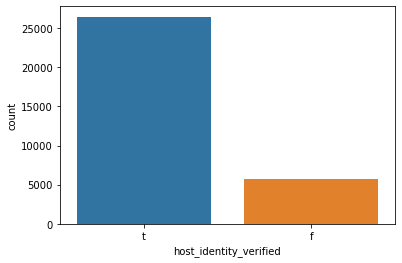

In [20]:
# distribution
sns.countplot(x='host_identity_verified', data=new_Airbnb_data)
plt.show()

# price <a class="anchor" id="price"></a>

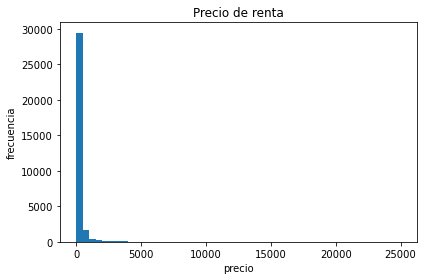

In [126]:
# view a histogram of the prices
fig, ax = plt.subplots()
n, bins, patches = ax.hist(Airbnb_data.price, 50)
ax.set_xlabel('precio')
ax.set_ylabel('frecuencia')
ax.set_title(r'Precio de renta')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [127]:
Airbnb_data.price.describe()

count    32240.000000
mean       266.104622
std        729.862325
min          0.000000
25%         75.750000
50%        125.000000
75%        226.000000
max      25000.000000
Name: price, dtype: float64

In [129]:
print("numero de datos con precio 25000:",len(new_Airbnb_data[(new_Airbnb_data.price == 25000)]))
print("numero de datos con precio 0:",len(new_Airbnb_data[(new_Airbnb_data.price == 0)]))
print("\n max price info:\n")
print(new_Airbnb_data[(new_Airbnb_data.price == 25000)].neighbourhood)
print("\n min price info:\n")
print(new_Airbnb_data[(new_Airbnb_data.price == 0)].neighbourhood)

numero de datos con precio 25000: 6
numero de datos con precio 0: 16

 max price info:

27668    NaN
27691    NaN
27692    NaN
27694    NaN
27695    NaN
27696    NaN
Name: neighbourhood, dtype: object

 min price info:

20265    NaN
20266    NaN
21031    NaN
21329    NaN
21330    NaN
21366    NaN
21427    NaN
21762    NaN
21763    NaN
21982    NaN
22106    NaN
22107    NaN
22108    NaN
22109    NaN
24944    NaN
24952    NaN
Name: neighbourhood, dtype: object


<div class = "alert alert-danger">
    <h3>Notas:</h3>
<br>    
<dl>
    <dt> El precio máximo es 25,000 </dt>
    <dd> - el número de datos con este precio son 6 </dd>
    <dd> - no hay un neighbourhood registrado para estos datos</dd>
    <dt>El precio mínimo 0 </dt>
    <dd> - no hay un neighbourhood registrado para estos datos</dd>
</dl>
</div>

In [ ]:
# obtain more info from bins of histogram
def bins_info(patches):
    C  = []
    for i in range(0,len(patches)):
        C.append(patches[i].get_xy()[0])
    dic = {f"[{C[i]},{C[i+1]})": patches[i].get_height() for i in range(len(patches)-1)}
    dic[f"[{C[-1]},{C[-1]+patches[-1].get_width()})"]= patches[-1].get_height()
    return dic

p = ax.patches
C = bins_info(p)
pd.DataFrame(C.items(),columns = ['bins','frecuency']).tail()

In [30]:
#Clean data
# if the price is less then 5 and greater than 2,000 revome it 
Airbnb_data_price = Airbnb_data[(Airbnb_data.price > 5) & (Airbnb_data.price <= 2000)]

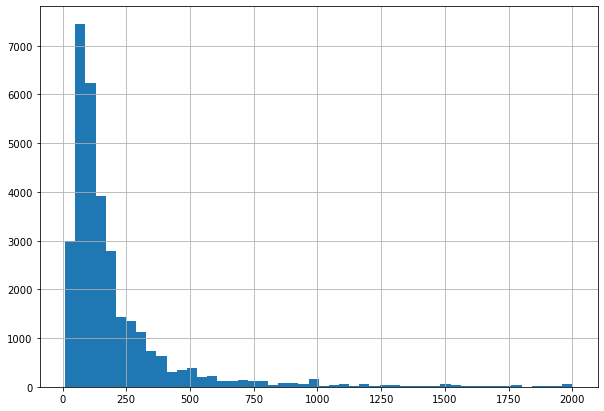

In [31]:
fig, ax = plt.subplots()
ax.set_xlabel('precio')
ax.set_ylabel('frecuencia')
ax.set_title(r'Precio de renta')
Airbnb_data_price.price.hist(bins=50, figsize=(10,7))
plt.show()

In [32]:
new_Airbnb_data1.price.describe()

count    31767.000000
mean       201.910347
std        247.442771
min         10.000000
25%         75.000000
50%        124.000000
75%        220.000000
max       2000.000000
Name: price, dtype: float64

## Regular Expressions

In [43]:
import re

In [44]:
pattern = r"Cookie"
sequence = "Cookie"
if re.match(pattern, sequence):
    print("Match!")
else: print("Not a match!")

Match!


In [45]:
#search() y group()
re.search(r'^Los', "Los Angeles/Burbank/Toluca Lake").group()
re.search(r'Angeles$', "Los santos Angeles").group()

#crear una lista con nombres correctos

'Angeles'

In [46]:
from collections import Counter
import numpy as np

#def words(text): return re.findall(r'\w+', text.lower())
#words = np.array([each_string.split() for each_string in df['Texto'].values])
WORDS = neigh_list
WORDS = Counter(WORDS)
WORDS
sum(list(WORDS.values()))

19599

In [47]:
def P(word, N = sum(list(WORDS.values()))): 
    "Probability of `word`."
    return WORDS[word] / N

word="Rosemead, California, United States"
P(word)

0.00331649573957855

# RapidFuzz

In [48]:
import rapidfuzz
from rapidfuzz import fuzz,string_metric

In [68]:
#pruebas con rapidfuzz
fuzz.ratio("Culver City".lower(), "Culver cty".lower())
#fuzz.ratio("Lost Angeles","Los Angeles")

95.23809523809524

In [137]:
correct_neighbourhood_list = correct_names_df.Neighborhood.to_list()
correct_neighbourhood_list[3]

'Leona Valley'

In [139]:
# solo los neigh que estan en nuestra base de datos
correct_neighbourhood_list_verif = []
for i in range(len(correct_neighbourhood_list)):
    if (len(return_list_cities(lista_ciudades, correct_neighbourhood_list[i])) > 0):
        correct_neighbourhood_list_verif.append(correct_neighbourhood_list[i])
correct_neighbourhood_list_verif

['Leona Valley',
 'Palmdale',
 'Acton',
 'Littlerock',
 'Quartz Hill',
 'Lancaster',
 'West Hollywood',
 'Hollywood Hills',
 'Los Feliz',
 'Silver Lake',
 'Westlake',
 'Echo Park',
 'Hollywood',
 'East Los Angeles',
 'Avalon',
 'San Pedro',
 'Wilmington',
 'Long Beach',
 'Signal Hill',
 'Lakewood',
 'Carson',
 'West Carson',
 'Val Verde',
 'Stevenson Ranch',
 'Castaic',
 'Santa Clarita',
 'Green Valley',
 'Lake Hughes',
 'Agua Dulce',
 'Pomona',
 'La Verne',
 'Claremont',
 'Woodland Hills',
 'Winnetka',
 'Canoga Park',
 'Granada Hills',
 'North Hills',
 'Northridge',
 'Reseda',
 'Lake Balboa',
 'Encino',
 'Tarzana',
 'Van Nuys',
 'Sherman Oaks',
 'Studio City',
 'Valley Village',
 'Valley Glen',
 'Mission Hills',
 'San Fernando',
 'Sun Valley',
 'North Hollywood',
 'Toluca Lake',
 'Lake View Terrace',
 'Shadow Hills',
 'BurBank',
 'Altadena',
 'Alhambra',
 'Arcadia',
 'Avocado Heights',
 'Azusa',
 'Baldwin Park',
 'Bradbury',
 'City of Industry',
 'Claremont',
 'Covina',
 'Diamond Bar'

In [132]:
def verificar_nombre_ciudad(lista_ciudades,correct_neighbourhood):
    dic = {}
    lista_ciudades_result = return_list_cities(lista_ciudades, correct_neighbourhood)
    for c in lista_ciudades_result:
        dic[c] = fuzz.ratio(correct_neighbourhood.lower(), c.lower())
    return dic

verificar_nombre_ciudad(lista_ciudades,"Leona Valley")

{'Leona Valley': 100.0}

In [115]:
def change_name(name, correct_name):
    value = fuzz.ratio(correct_name.lower(), name.lower())
    if value >= 95:
        name = correct_name
    return name

In [120]:
neig_list = list(Airbnb_data_neigh2[["Neighbourhood", "neighbourhood"]].Neighbourhood)
#hacer esto para todas las ciudades (solo se van a cambiar las que menos errores tengasn)
correct_names=list(map(lambda x:change_name(x,"Culver City"),neig_list))
correct_names
df_correct_name = pd.DataFrame(correct_names,columns=['correct_city_name'])
df_correct_name

,correct_city_name
0,Los Angeles
1,Santa Monica
2,Bellflower
3,Los Angeles
4,Los Angeles
...,...
19594,Los Angeles
19595,Los Angeles
19596,Los Angeles
19597,Los Angeles


# Description

In [344]:
# No sé que es cleansed
#new_Airbnb_data1['neighbourhood_cleansed'].unique()
#con un .loc encontrar todas estas ciudades
"https://www.airbnb.com/rooms/2708".split("/")[4] #idea: generar un id para el dataframe

'2708'

In [122]:
#extact text
def extract_description(column_name, dataframe):
    #from re import sub
    for i in range(dataframe.shape[0]):
        #print("writing: ",i," texfile")
        try:
            text = dataframe[column_name][i]
            text = text.replace('<br />', '').replace('<br />', '').replace('<b>','').replace('</b>','') #Deleting a specific item from text file in python
            listing_url = dataframe.listing_url[i]
            Id=listing_url.split("/")[4]
            text_file = open("Text_Files/"+Id+".txt", "w")
            n = text_file.write(text)
            text_file.close()
        except:
            print("nan")

In [123]:
extract_description(column_name="description",dataframe=Airbnb_data_neigh)
#"Text_Files/"+Airbnb_data_neigh.listing_url[0]


NameError: name 'Airbnb_data_neigh' is not defined

In [381]:
Airbnb_data_neigh["description"][904]

nan

In [352]:
from re import sub
text = """<td>Zulfahmi</td>, <td>081354</td>, <td>Fachrial</td>, <td>0823</td>, <td>1203188</td>"""
text = sub('<(/*)td>', '', text)


'Zulfahmi, 081354, Fachrial, 0823, 1203188'

# Matriz de correlación

<AxesSubplot:>

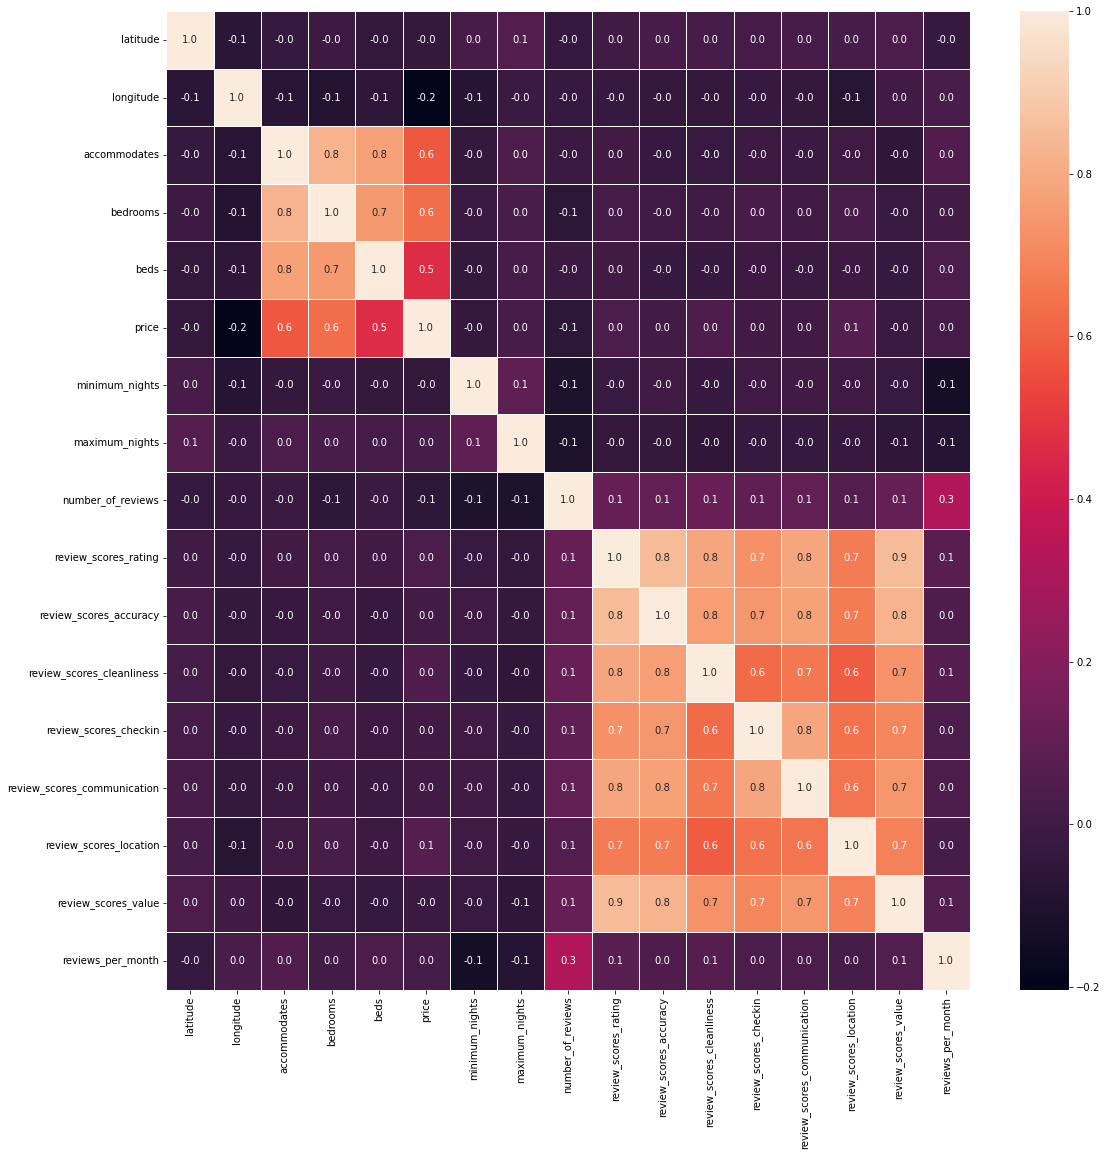

In [94]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(new_Airbnb_data1.corr(), annot=True, linewidths = .5, fmt='.1f', ax = ax)

# Boxplots


<AxesSubplot:title={'center':'price'}, xlabel='host_identity_verified'>

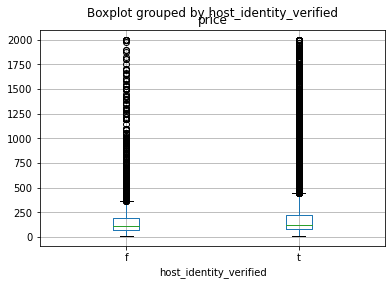

In [95]:
new_Airbnb_data1.boxplot(column = 'price', by = 'host_identity_verified')

# Scatter

<AxesSubplot:xlabel='beds', ylabel='price'>

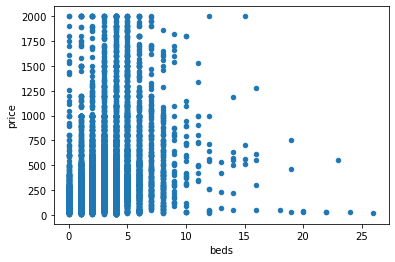

In [96]:
new_Airbnb_data1.plot(kind = "scatter", x = "beds",y = "price")

In [97]:
#import matplotlib.pyplot as plt
#new_Airbnb_data1.reviews_per_month.hist(bins=50, figsize=(10,7))
#plt.show()

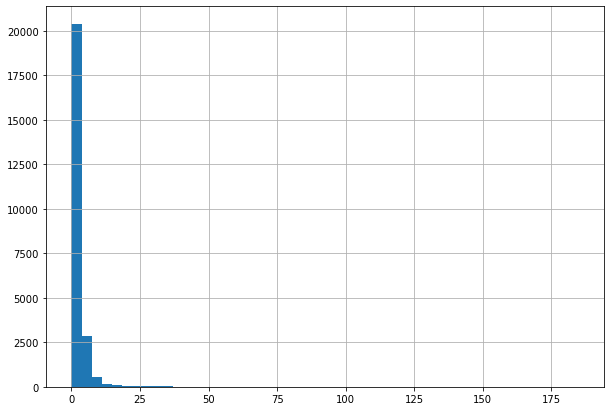

In [98]:
import matplotlib.pyplot as plt
Airbnb_data.reviews_per_month.hist(bins=50, figsize=(10,7))
plt.show()

In [278]:
new_Airbnb_data2 = new_Airbnb_data1.copy()
new_Airbnb_data2['calendar_last_scrape']="07/08/2021"
new_Airbnb_data3 = new_Airbnb_data2[~new_Airbnb_data2.last_review.isnull()]
new_Airbnb_data3= new_Airbnb_data3[~new_Airbnb_data3.first_review.isnull()]
l1 =new_Airbnb_data3.last_review[0].split("/")
l1.append('20'+l1.pop())
l1
list(map(int,new_Airbnb_data3.last_review[0].split("/"))) # => [1,2,3]
#f_date = date('16', '7', '2')

[15, 5, 16]

In [279]:
from datetime import date, timedelta
current_date = date.today()
current_date
#Airbnb lanzada en 2008

datetime.date(2021, 9, 7)

In [280]:
def convert_date(dato):
    l1 =dato.split("/")
    l1.append('20'+l1.pop())
    l2 = list(map(int,l1))
    day = l2[0]
    month=l2[1]
    year = l2[2]
    return date(year, month,day)

In [281]:
convert_date("07/08/21") # esta es la fecha de ultima scrape

datetime.date(2021, 8, 7)

In [282]:
def convert_to_date(dato):
    dato = dato.replace("days, 0:00:00","").strip()
    dato = dato.replace("day, 0:00:00","").strip()
    dato = dato.replace('0:00:00',"0").strip()
    #dato = dato.replace("''","").strip()
    #dato = dato.replace("day, 0:00:00","").strip()
    return int(dato)

def antiguedad(first_review,last_scrape):
    last_scrape= convert_date(last_scrape)
    first_review=convert_date(first_review)
    dato = last_scrape-first_review
    dato = convert_to_date(str(dato))
    return dato

def dias_transcurridos_last_review(last_review,last_scrape):
    last_scrape= convert_date(last_scrape)
    last_review=convert_date(last_review)
    dato = last_scrape-last_review
    dato = convert_to_date(str(dato))
    return dato

In [283]:
print(antiguedad("07/08/21","07/08/21"))
#print(dias_transcurridos_last_review("15/05/16","07/08/21"))

0


In [284]:
new_Airbnb_data3= new_Airbnb_data3[['host_response_time', 'host_response_rate',
                          'host_acceptance_rate','host_is_superhost','price','number_of_reviews','first_review',
                                    'last_review','review_scores_rating',
                          'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                          'review_scores_communication', 'review_scores_location','review_scores_value',
                          'reviews_per_month'
                         ]]
print(new_Airbnb_data3.shape)
#ver los index del dataframe
#print([new_Airbnb_data3.index])
#new_Airbnb_data3.set_index()

(24064, 16)


In [285]:
s = pd.Series( range(0, 24064, 1) )
new_Airbnb_data3.set_index([s], inplace = True)
#print(type(range(0, 24064, 1)))
#len(list(range(0, 24064, 1)))
new_Airbnb_data3

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,price,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,NaN,NaN,f,115.0,2,15/08/11,15/05/16,4.00,5.00,5.00,3.00,4.00,5.00,4.00,0.02
1,within an hour,100%,100%,t,74.0,31,29/12/17,19/06/21,4.84,4.77,4.90,5.00,4.97,5.00,4.84,0.71
2,within an hour,100%,36%,t,177.0,21,13/01/17,27/12/19,4.68,4.45,4.57,4.65,4.70,4.90,4.40,0.38
3,within a few hours,100%,25%,f,118.0,23,03/01/17,31/10/18,4.04,4.04,3.83,3.96,4.30,4.64,4.00,0.41
4,within a few hours,100%,80%,t,50.0,311,29/11/15,31/07/21,4.79,4.88,4.85,4.91,4.92,4.79,4.70,4.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24059,within an hour,66%,75%,f,25.0,1,01/08/21,01/08/21,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24060,within an hour,100%,100%,f,230.0,1,06/08/21,06/08/21,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24061,within an hour,97%,99%,f,350.0,1,02/08/21,02/08/21,4.00,4.00,5.00,4.00,4.00,5.00,4.00,1.00
24062,within an hour,100%,100%,f,59.0,1,03/08/21,03/08/21,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00


In [286]:
first_review = list(new_Airbnb_data3.first_review)
#first_review
antiguedad_relativa=list(map(lambda x:antiguedad(x,last_scrape ="07/08/21"),first_review))
df_ant_rel = pd.DataFrame(antiguedad_relativa,columns=['days_of_relative_antiquity'])

#cambiar tipo de dato
#df_ant_rel["relative_antiquity"]=df_ant_rel.relative_antiquity

#preguntar si tenemos variables nulas
print([df_ant_rel.isnull().sum()])
#tamaño del dataframe
print(df_ant_rel.shape)

[days_of_relative_antiquity    0
dtype: int64]
(24064, 1)


In [287]:
last_review = list(new_Airbnb_data3.last_review)
days_past_from_lastreview=list(map(lambda x:dias_transcurridos_last_review(x,last_scrape ="07/08/21"),last_review))
df_last_rev = pd.DataFrame(days_past_from_lastreview,columns=['days_past_from_lastreview'])

#cambiar tipo de dato
#df_last_rev.days_past_from_lastreview=df_last_rev.days_past_from_lastreview.astype(str)

#preguntar si tenemos variables nulas
print(df_last_rev.isnull().sum())
#tamaño del dataframe
print(df_last_rev.shape)

days_past_from_lastreview    0
dtype: int64
(24064, 1)


In [288]:
df_reviews_days=df_ant_rel.join(df_last_rev.days_past_from_lastreview)
#preguntar si tenemos variables nulas
print(df_reviews_days.isnull().sum())

days_of_relative_antiquity    0
days_past_from_lastreview     0
dtype: int64


In [289]:
new_Airbnb_data3 = new_Airbnb_data3.join(df_reviews_days)
new_Airbnb_data3

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,price,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_of_relative_antiquity,days_past_from_lastreview
0,NaN,NaN,NaN,f,115.0,2,15/08/11,15/05/16,4.00,5.00,5.00,3.00,4.00,5.00,4.00,0.02,3645,1910
1,within an hour,100%,100%,t,74.0,31,29/12/17,19/06/21,4.84,4.77,4.90,5.00,4.97,5.00,4.84,0.71,1317,49
2,within an hour,100%,36%,t,177.0,21,13/01/17,27/12/19,4.68,4.45,4.57,4.65,4.70,4.90,4.40,0.38,1667,589
3,within a few hours,100%,25%,f,118.0,23,03/01/17,31/10/18,4.04,4.04,3.83,3.96,4.30,4.64,4.00,0.41,1677,1011
4,within a few hours,100%,80%,t,50.0,311,29/11/15,31/07/21,4.79,4.88,4.85,4.91,4.92,4.79,4.70,4.49,2078,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24059,within an hour,66%,75%,f,25.0,1,01/08/21,01/08/21,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,6,6
24060,within an hour,100%,100%,f,230.0,1,06/08/21,06/08/21,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,1,1
24061,within an hour,97%,99%,f,350.0,1,02/08/21,02/08/21,4.00,4.00,5.00,4.00,4.00,5.00,4.00,1.00,5,5
24062,within an hour,100%,100%,f,59.0,1,03/08/21,03/08/21,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,4,4


In [297]:
print(max(new_Airbnb_data3.days_of_relative_antiquity))
print(min(new_Airbnb_data3.days_of_relative_antiquity))
print(new_Airbnb_data3.days_of_relative_antiquity.describe())

4336
1
count    24064.000000
mean       921.155170
std        714.777165
min          1.000000
25%        311.000000
50%        783.000000
75%       1378.000000
max       4336.000000
Name: days_of_relative_antiquity, dtype: float64


<AxesSubplot:xlabel='price', ylabel='days_of_relative_antiquity'>

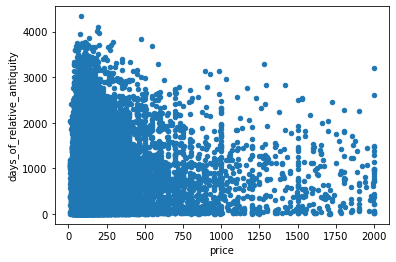

In [291]:
new_Airbnb_data3.plot(kind = "scatter", x = "price",y = "days_of_relative_antiquity")
# Pairwise correlation
#sns.pairplot(new_Airbnb_data1, hue="host_identity_verified", corner=True)
#plt.show()

In [307]:
df_test = new_Airbnb_data3[['price', 'host_is_superhost']]
df_grp = df_test.groupby(['host_is_superhost'],as_index=True).mean()
df_grp

,price
host_is_superhost,
f,188.059692
t,199.297935


<AxesSubplot:xlabel='price', ylabel='days_of_relative_antiquity'>

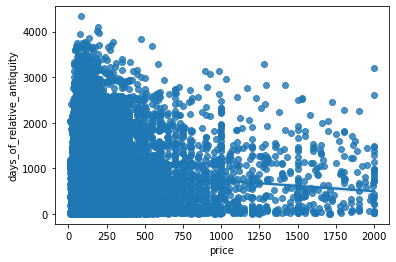

In [309]:
sns.regplot(x = "price",y = "days_of_relative_antiquity",data=new_Airbnb_data3)

In [310]:
new_Airbnb_data3[['price', 'host_is_superhost']].corr()

,price
price,1.0


<AxesSubplot:xlabel='price', ylabel='host_is_superhost'>

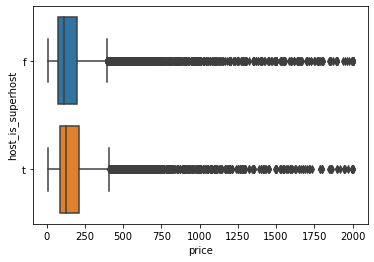

In [312]:
sns.boxplot(x = 'price', y = "host_is_superhost", data=new_Airbnb_data3)

In [315]:
#new_Airbnb_data3.info()
new_Airbnb_data3.describe(include=['object'])

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,first_review,last_review
count,18194,18194,18639,24059,24064,24064
unique,4,77,100,2,2875,2047
top,within an hour,100%,100%,f,31/05/21,01/08/21
freq,12040,12513,5131,15245,73,755


In [319]:
host_response_time_df = new_Airbnb_data3["host_response_time"].value_counts().to_frame()
host_response_time_df.index.name = "time"
host_response_time_df

,host_response_time
time,
within an hour,12040
within a few hours,3386
within a day,1949
a few days or more,819


- a heat map of the listings in NY 
    - the color represents the price 
    - the size of the circle represents the number of reviews

#  Análisis de datos geográficos

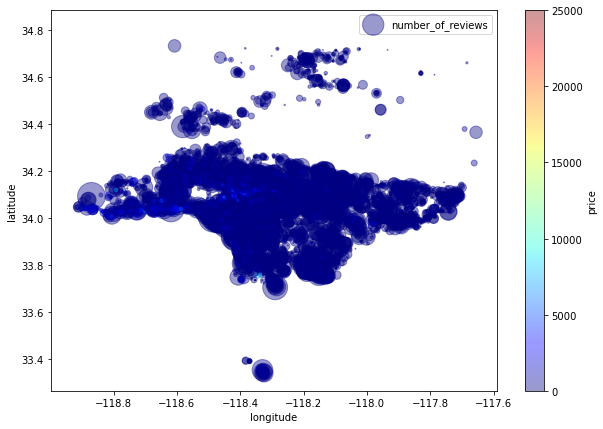

In [41]:
Airbnb_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=Airbnb_data["number_of_reviews"], label="number_of_reviews", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [41]:
new_Airbnb_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31767 entries, 0 to 32239
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_url                  31767 non-null  object 
 1   name                         31765 non-null  object 
 2   description                  30698 non-null  object 
 3   neighborhood_overview        19599 non-null  object 
 4   picture_url                  31767 non-null  object 
 5   host_location                31655 non-null  object 
 6   host_about                   19122 non-null  object 
 7   host_response_time           23258 non-null  object 
 8   host_response_rate           23258 non-null  object 
 9   host_acceptance_rate         23458 non-null  object 
 10  host_is_superhost            31726 non-null  object 
 11  host_picture_url             31726 non-null  object 
 12  host_neighbourhood           25520 non-null  object 
 13  host_has_profile

# Análisis de Imágenes

In [306]:
# cuántas fotos tenemos
len(Airbnb_data['picture_url'])

32240

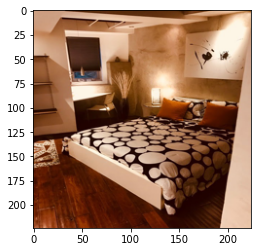

In [7]:
from PIL import Image
import requests
from io import BytesIO

IMAGE_SIZE = [224,224]

response = requests.get(Airbnb_data['picture_url'][4])
img = Image.open(BytesIO(response.content)).resize(IMAGE_SIZE)
plt.imshow(img)

In [11]:
import colorgram

rgb_colors = []
colors = colorgram.extract(img, 30)
for color in colors:
    r = color.rgb.r
    g = color.rgb.g
    b = color.rgb.b
    new_color = (r, g, b)
    rgb_colors.append(new_color)

print(rgb_colors)
print(len(rgb_colors))

[(69, 23, 6), (203, 156, 123), (144, 88, 48), (238, 211, 186), (114, 48, 18), (31, 2, 4), (180, 120, 71), (110, 59, 11), (224, 188, 156), (169, 117, 89), (65, 75, 91), (92, 77, 83), (220, 185, 164), (41, 54, 70), (162, 146, 151), (75, 58, 61), (51, 60, 77), (161, 156, 167), (200, 185, 186)]
19


In [12]:
Airbnb_data.price[4]

118.0

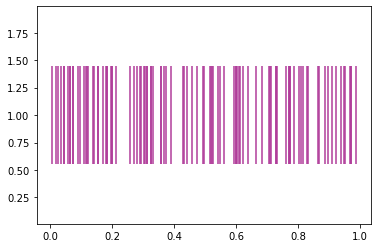

In [9]:
spikes = np.random.random(100)
plt.eventplot(spikes, orientation='horizontal', linelengths=0.9, color = [(.69, .23, .6)])

plt.show()

In [10]:
import turtle as turtle_module
import random

colours = rgb_colors
tim = turtle_module.Turtle()
turtle_module.colormode(255)
tim.speed("fastest")
tim.hideturtle()

def initial_position():
    tim.penup()
    tim.setheading(225)
    tim.forward(300)
    tim.setheading(0)

initial_position()

def move_right():
    for _ in range(10):
        tim.dot(20)
        tim.penup()
        tim.forward(50)
        tim.pencolor(random.choice(colours))


def move_left():
    tim.dot(20)
    tim.penup()
    tim.forward(-500)


def move_up():
    tim.setheading(90)
    tim.dot(20)
    tim.penup()
    tim.forward(50)
    tim.setheading(0)


for play in range(10):
    move_right()
    move_left()
    move_up()

screen = turtle_module.Screen()
screen.exitonclick()